# IDATT2502 ML - Exercise 07

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib as plt

# Load the dataset
columns = ["class", "cap_shape", "cap_surface", "cap_color", "bruises", "odor", "gill_attachment", "gill_spacing",
           "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
           "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color", "ring_number", "ring_type",
           "spore_print_color", "population", "habitat"]

mushroom_data = pd.read_csv('./data/agaricus-lepiota.data', header=None, names=columns)

# Drop the 'class' column (which indicates edible/poisonous) as it's the target variable
X = mushroom_data.drop('class', axis=1)

# Apply one-hot encoding to the categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

print(f"Shape of encoded dataset: {X_encoded.shape}")


Shape of encoded dataset: (8124, 117)


In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

ValueError: could not convert string to float: 'x'

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of k values (number of clusters) to evaluate
k_values = range(2, 31)
silhouette_scores = []

# Apply K-means for each k and calculate the silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_encoded)
    score = silhouette_score(X_encoded, labels)
    silhouette_scores.append(score)

# Print silhouette scores
print(silhouette_scores)

[0.16223992558489375, 0.21591966205500285, 0.22534652135569389, 0.25418714597264586, 0.26975733675934394, 0.2829575093696461, 0.2884456944258713, 0.22189411275928528, 0.1820939851229345, 0.2491244324026857, 0.20371292075855832, 0.2022282644060126, 0.202148051009577, 0.16760378103255066, 0.1594661297763618, 0.1617197437461969, 0.16425661626718255, 0.1698371765835042, 0.12976039005648618, 0.14254166466733875, 0.14531810616969282, 0.145842330710773, 0.14782746294019125, 0.14755283723377444, 0.15053318064886806, 0.1516208583526816, 0.15949258991027745, 0.14961319708463566, 0.14889712213125864]


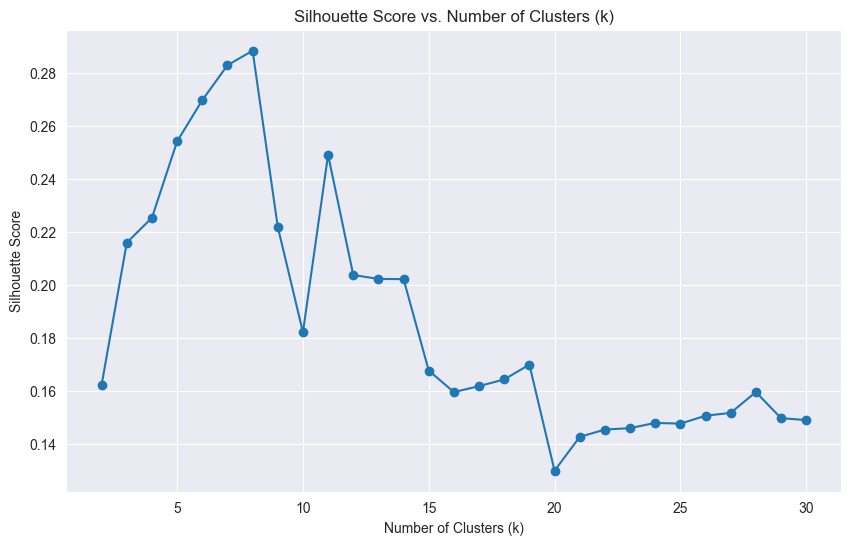

In [7]:
import matplotlib.pyplot as plt

# Plotting the silhouette score for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

/var/folders/ng/n6fsp0mn2n5gpkjdpmnj74lc0000gn/T/ipykernel_1215/2398612666.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_pca[:, 0], X_pca[:, 1], c=c, cmap='viridis', s=50 * factor, alpha=alpha)


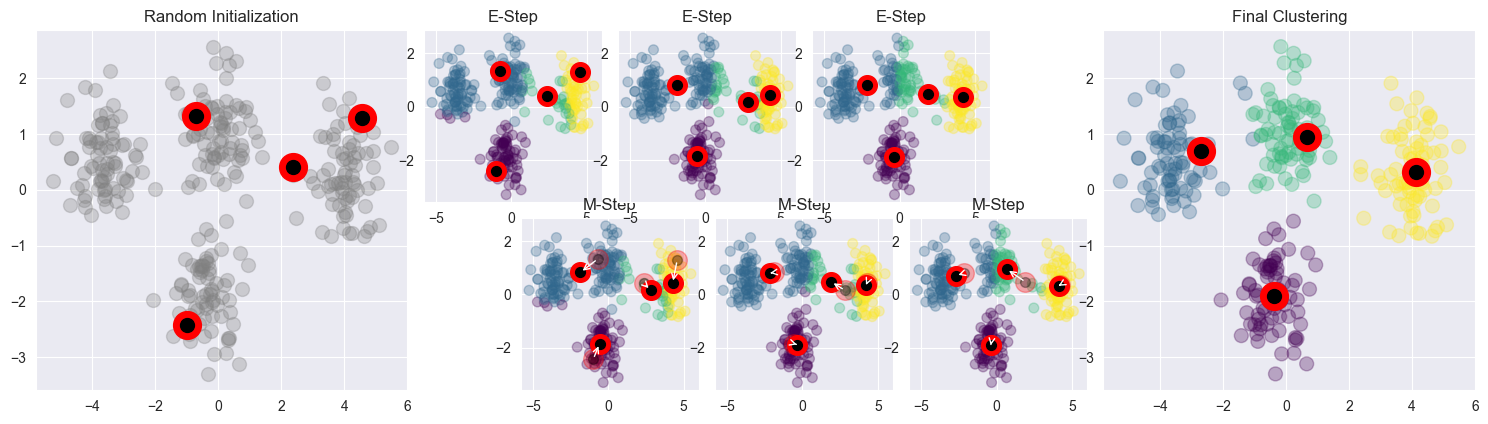

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from sklearn.decomposition import PCA

# Generate sample data (we can use this for a smaller dataset to visualize clearly)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Initialize k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Function to draw points and centroids
def draw_points(ax, c, factor=1, alpha=0.3):
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=c, cmap='viridis', s=50 * factor, alpha=alpha)

def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200 * factor, alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=50 * factor, alpha=alpha)

# Initial random centers (choose random points)
rng = np.random.RandomState(42)
centers = X_pca[rng.choice(X_pca.shape[0], 4, replace=False)]

# Prepare plot layout
fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)

# Initial random initialization (before k-means starts)
ax0 = fig.add_subplot(gs[:4, :4])
ax0.set_title("Random Initialization")
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

# Running the E-step and M-step iteratively (show intermediate and final steps)
for i in range(3):
    # E-step: Assign labels based on the nearest center
    ax1 = fig.add_subplot(gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = fig.add_subplot(gs[2:, 5 + 2 * i:7 + 2 * i])

    # Assign labels based on the nearest center
    y_pred = pairwise_distances_argmin(X_pca, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)

    # M-step: Recompute centroids based on current assignments
    new_centers = np.array([X_pca[y_pred == j].mean(0) for j in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)

    # Add arrows to show center movement
    for j in range(4):
        ax2.annotate('', new_centers[j], centers[j], arrowprops=dict(arrowstyle='->', linewidth=1))

    # Finish iteration by updating centers
    centers = new_centers
    ax1.set_title("E-Step")
    ax2.set_title("M-Step")

# Final clustering (after convergence)
y_pred = pairwise_distances_argmin(X_pca, centers)
axf = fig.add_subplot(gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.set_title("Final Clustering")


plt.show()

# Save the plot as .png
fig.savefig('ex_07-expectation-maximization.png')


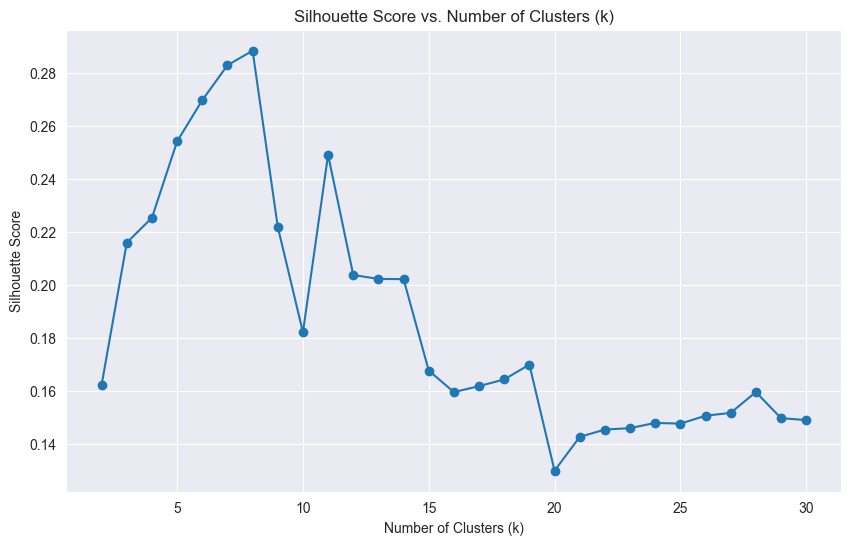

In [5]:
import matplotlib.pyplot as plt

# Function to plot silhouette score vs. number of clusters (k)
def plot_silhouette_vs_k(k_values, silhouette_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

# Plot silhouette scores
plot_silhouette_vs_k(k_values, silhouette_scores)


In [6]:
# Visualize clusters for the optimal k (let's assume k=5 is optimal from silhouette analysis)
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X_encoded)
plot_clusters(X_encoded, kmeans_optimal, optimal_k)


NameError: name 'plot_clusters' is not defined